In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
loan_data = pd.read_csv('../ML PROJ/loan.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan_data.shape

(614, 13)

In [5]:
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#statistical measures

loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#dropping missing values
loan_data = loan_data.dropna()

In [8]:
loan_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#label encoding

loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace = True)

In [10]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [11]:
loan_data['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [12]:
loan_data = loan_data.replace(to_replace = '3+', value = 4)

In [13]:
loan_data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

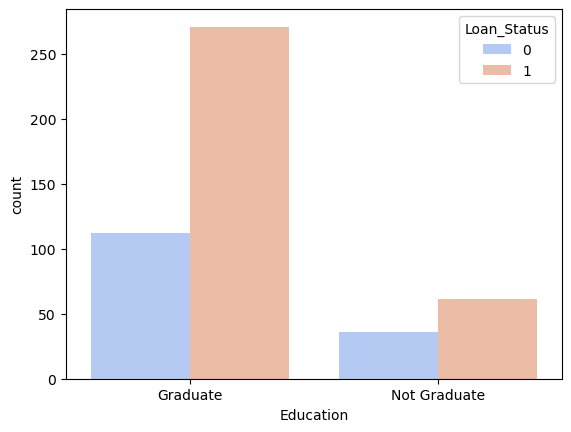

In [14]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].astype(str)

sns.countplot(data=loan_data, x='Education', hue='Loan_Status', palette='coolwarm')

<Axes: xlabel='Married', ylabel='count'>

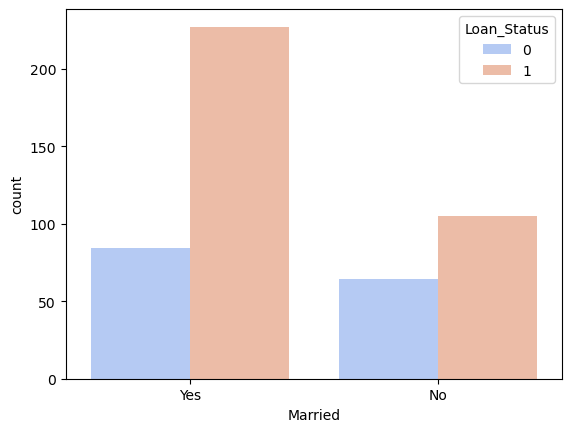

In [15]:
sns.countplot(data=loan_data, x='Married', hue='Loan_Status', palette='coolwarm')

In [16]:
#convert categorical to numeric values

loan_data.replace({"Married":{'No':0,'Yes':1}},inplace = True)
loan_data.replace({"Gender":{'Male':0,'Female':1}},inplace = True)
loan_data.replace({"Self_Employed":{'No':0,'Yes':1}},inplace = True)
loan_data.replace({"Education":{'Not Graduate':0,'Graduate':1}},inplace = True)
loan_data.replace({"Property_Area":{'Rural':0,'Semiurban':1, 'Urban':2}},inplace = True)


In [17]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
X = loan_data.drop(columns =['Loan_ID', 'Loan_Status'])
Y = loan_data['Loan_Status']

In [19]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [20]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: object

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10, stratify = Y, random_state = 2) 

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [23]:
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
122       1        0          0          1              0             2137   
498       0        1          1          1              1             2895   
144       0        1          2          1              0            11757   
217       0        1          0          1              0             3727   
362       0        1          0          1              0             4750   
..      ...      ...        ...        ...            ...              ...   
72        0        0          0          1              0             3500   
390       0        0          4          1              0             9167   
76        0        0          0          1              0             3750   
286       1        0          0          1              1             2600   
376       0        1          4          1              0             8750   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [24]:
#training model SVM 

svm_model = svm.SVC(kernel = 'linear')

In [25]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
  -1.31886834]
 [-0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 [-0.46719815  0.73716237 -0.70475462 ...  0.27554157  0.41319694
   1.25977445]
 ...
 [-0.46719815  0.73716237  0.11235219 ...  0.27554157  0.41319694
   1.25977445]
 [-0.46719815  0.73716237  0.92945899 ...  0.27554157  0.41319694
   1.25977445]
 [ 2.14041943 -1.35655324 -0.70475462 ...  0.27554157 -2.42015348
  -0.02954695]]


In [26]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
#accuracy on train data

X_train_prediction = svm_model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', train_data_accuracy)

Accuracy on Training Data :  0.7476851851851852


In [28]:
#accuracy on test data

X_test_prediction = svm_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Training Data : ', test_data_accuracy)

Accuracy on Training Data :  0.8333333333333334


In [29]:
# Example input data for prediction
input_data = (0, 0, 0, 0, 0, 0, 0.0, 0, 0.0, 0.0, 0)

# Convert input data to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler
std_data = scaler.transform(input_data_reshaped)
print("Standardized input data:", std_data)

# Make the prediction
prediction = svm_model.predict(std_data)
print(prediction)

# Ensure correct prediction output format
if int(prediction[0]) == 0:
    print('The loan application is likely to be rejected')
else:
    print('The loan application is likely to be approved')


Standardized input data: [[-0.46719815 -1.35655324 -0.70475462 -1.98707162 -0.3992747  -0.94735175
  -0.604633   -1.79964877 -5.25064031 -2.42015348 -1.31886834]]
['0']
The loan application is likely to be rejected


C:\Users\rupab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\rupab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
# Example input data
input_data = (1, 1, 1, 1, 1, 99000, 0.0, 66.0, 360.0, 1.0, 2)

# Convert input data to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data using the same scaler
std_data = scaler.transform(input_data_reshaped)
print("Standardized input data:", std_data)

# Make the prediction
prediction = svm_model.predict(std_data)
print(prediction)

# Ensure correct prediction output format
if int(prediction[0]) == 0:
    print('The loan application is likely to be rejected')
else:
    print('The loan application is likely to be approved')


Standardized input data: [[ 2.14041943  0.73716237  0.11235219  0.50325312  2.50454133 16.53657443
  -0.604633   -0.97900085  0.27554157  0.41319694  1.25977445]]
['0']
The loan application is likely to be rejected


C:\Users\rupab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\rupab\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
